In [36]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[*********************100%***********************]  1 of 1 completed

0.39808044024248007


Price,Close,High,Low,Open,Volume,20_ma,200_ma,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,
2022-07-21,100.790001,101.045998,97.470001,98.750000,251200,97.086000,104.76935,NaN,NaN,NaN
2022-07-22,95.449997,101.910004,94.190002,99.959999,155600,96.867500,104.52235,-1.0,-0.052981,0.052981
2022-07-25,96.500000,97.544998,92.989998,95.610001,256200,96.606000,104.29760,-1.0,-0.042564,0.041398
2022-07-26,95.110001,96.379997,92.519997,95.339996,178700,96.530000,103.98885,-1.0,-0.056355,0.056399
2022-07-27,97.570000,99.489998,95.300003,97.820000,328200,96.835000,103.64410,-1.0,-0.031948,0.029075
...,...,...,...,...,...,...,...,...,...,...
2025-09-23,299.500000,305.484985,293.500000,305.459991,1454300,292.665749,370.51970,-1.0,1.971525,0.431754
2025-09-24,301.170013,304.237000,293.829987,302.059998,1348300,291.923250,370.20230,-1.0,1.988094,0.423771
2025-09-25,313.489990,315.204987,294.450012,295.579987,1655300,291.701250,369.90460,-1.0,2.110328,0.365529


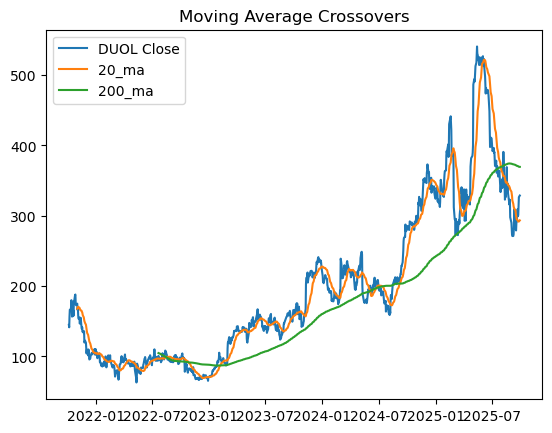

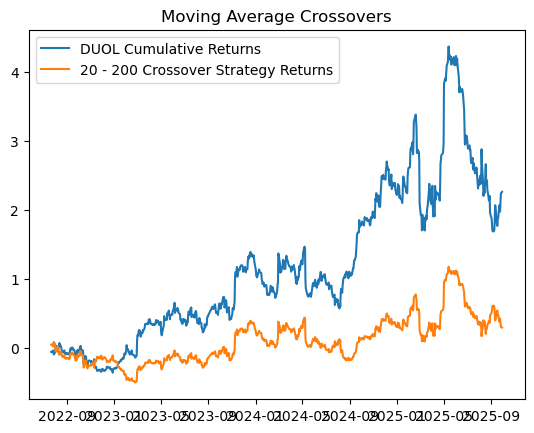

In [37]:
TICKER = 'DUOL'
FAST = 20
SLOW = 200
LOOKBACK = 1000

def get_data():
    df = yf.download(TICKER)
    df.columns = df.columns.get_level_values(0)
    return df.iloc[-LOOKBACK:,:]
def add_moving_average(df,ticker, fast, slow):
    df[f'{FAST}_ma'] = df['Close'].rolling(fast).mean()
    df[f'{SLOW}_ma'] = df['Close'].rolling(slow).mean()
    plt.plot(df['Close'])
    plt.plot(df[f'{FAST}_ma'])
    plt.plot(df[f'{SLOW}_ma'])
    plt.title('Moving Average Crossovers')
    plt.legend([f'{ticker} Close', f'{fast}_ma', f'{slow}_ma'])
    return df.dropna()
# long if fast > slow, short if otherwise
def add_strategy(df, fast, slow):
    df['Strategy'] = np.where(df[f'{fast}_ma'] > df[f'{slow}_ma'], 1, -1)
    df['Strategy']= df['Strategy'].shift(1)
    return df 
def test_strategy(df, ticker, fast, slow):
    df['Asset_Returns'] = (1+ df['Close'].pct_change()).cumprod()-1
    df['Strategy_Returns']= (1+df['Close'].pct_change()*df['Strategy']).cumprod()-1
    strategy_returns = df['Close'].pct_change() * df['Strategy_Returns']
    sharpe_ratio = (strategy_returns.mean() / strategy_returns.std()) * np.sqrt(252)
    print(sharpe_ratio)
    plt.figure()
    plt.plot(df['Asset_Returns'])
    plt.plot(df['Strategy_Returns'])
    plt.legend([f'{ticker} Cumulative Returns', f'{fast} - {slow} Crossover Strategy Returns'])
    plt.title('Moving Average Crossovers')
    return df

df = get_data()
df = add_moving_average(df,TICKER, FAST,SLOW)
df = add_strategy(df, FAST, SLOW)
df = test_strategy(df, TICKER, FAST, SLOW)


df